# Описание проекта
Здесь должно находиться Лого проекта, и его описание. Мотивация, средства. Указать ссылки на используемые ресурсы. Так как ипользуется html, то все картинки должны быть расположены на доступных сервисах

Можно указать, что используется вычислительная платформа Анаконда (Картинки logo Anaconda & Jupyter)
<p><img class="logo logo-dark" alt="logo" src="https://www.anaconda.com/wp-content/themes/anaconda/images/logo-dark.png"></p>

In [1]:
#some initial setup
# Importing pandas
import pandas as pd
# This command makes plots appear in the notebook
%matplotlib inline

# Загрузка данных
Первоначально данные загружаются с ресурса <a href="https://wonder.cdc.gov">CDC WONDER</a> в виде текстовых файлов. Затем эти сырые данные нужно загрузить в память в так называемые фреймы данных <b>pandas</b>:

In [11]:
# Assign filename: file
file = 'datasets/maxTempByMonthYear1999-2011completeCalifornia.txt'

# Import file: data
raw_temp_data = pd.read_csv(file, sep='\t', converters={"Year":int, 'Month Code':int, 'Day of Month':int,'Avg Daily Max Air Temperature (C)':float})

# Print the head of the DataFrame
print(raw_temp_data.head())

   Notes       State  State Code  Year  Year Code Month  Month Code  \
0    NaN  California           6  1999       1999   Jan           1   
1    NaN  California           6  1999       1999   Jan           1   
2    NaN  California           6  1999       1999   Jan           1   
3    NaN  California           6  1999       1999   Jan           1   
4    NaN  California           6  1999       1999   Jan           1   

   Day of Month  Day of Month Code  Avg Daily Max Air Temperature (C)  
0             1                  1                              13.35  
1             2                  2                              14.78  
2             3                  3                              13.77  
3             4                  4                              14.32  
4             5                  5                              14.89  


Теперь нужно избавиться от лишнего, создадим новый фрейм с колонками для дат и максимальной температуры:

In [12]:
raw_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 10 columns):
Notes                                0 non-null float64
State                                4514 non-null object
State Code                           4514 non-null int64
Year                                 4514 non-null int64
Year Code                            4514 non-null int64
Month                                4514 non-null object
Month Code                           4514 non-null int64
Day of Month                         4514 non-null int64
Day of Month Code                    4514 non-null int64
Avg Daily Max Air Temperature (C)    4514 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 352.7+ KB


In [13]:
california_temp_data = raw_temp_data[['State', 'Year', 'Month Code', 'Day of Month', 'Avg Daily Max Air Temperature (C)']]

In [14]:
california_temp_data.head()

,State,Year,Month Code,Day of Month,Avg Daily Max Air Temperature (C)
0,California,1999,1,1,13.35
1,California,1999,1,2,14.78
2,California,1999,1,3,13.77
3,California,1999,1,4,14.32
4,California,1999,1,5,14.89


In [15]:
california_temp_data.columns = ['state','year', 'month','day','max_temp']

In [16]:
california_temp_data.head()

,state,year,month,day,max_temp
0,California,1999,1,1,13.35
1,California,1999,1,2,14.78
2,California,1999,1,3,13.77
3,California,1999,1,4,14.32
4,California,1999,1,5,14.89


In [24]:
california_summer_temp_data = california_temp_data[(california_temp_data['month']>=5) & (california_temp_data['month']<=9)]

In [26]:
california_summer_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 113 to 4429
Data columns (total 5 columns):
state       1989 non-null object
year        1989 non-null int64
month       1989 non-null int64
day         1989 non-null int64
max_temp    1989 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 93.2+ KB


In [27]:
california_summer_temp_data.head(10)

,state,year,month,day,max_temp
113,California,1999,5,1,18.79
114,California,1999,5,2,15.01
115,California,1999,5,3,12.95
116,California,1999,5,4,16.11
117,California,1999,5,5,22.11
118,California,1999,5,6,23.43
119,California,1999,5,7,20.93
120,California,1999,5,8,19.19
121,California,1999,5,9,18.02
122,California,1999,5,10,19.22


In [28]:
df_1999 = california_summer_temp_data[california_summer_temp_data['year']==1999]

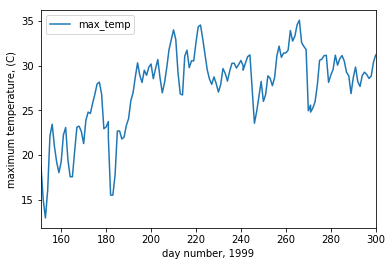

In [32]:
ax = df_1999.plot(x=30*df_1999['month']+df_1999['day'], y = 'max_temp')
_ = ax.set_xlabel("day number, 1999")
_ = ax.set_ylabel("maximum temperature, (C)")

Теперь попробуем сгруппировать данные по годам и месяцам:

In [33]:
california_summer_temp_data.groupby(['year','month'])['max_temp'].max()

year  month
1999  5        28.14
      6        33.99
      7        34.54
      8        35.07
      9        31.19
2000  5        31.60
      6        34.78
      7        36.10
      8        36.40
      9        33.73
2001  5        33.67
      6        33.70
      7        37.19
      8        36.42
      9        32.78
2002  5        30.93
      6        32.33
      7        37.41
      8        36.70
      9        35.02
2003  5        32.44
      6        34.43
      7        35.98
      8        34.75
      9        34.18
2004  5        29.49
      6        31.25
      7        34.70
      8        36.88
      9        33.90
               ...  
2006  5        29.98
      6        35.68
      7        38.41
      8        33.86
      9        34.23
2007  5        28.46
      6        32.60
      7        38.09
      8        36.12
      9        34.79
2008  5        32.27
      6        34.08
      7        37.14
      8        35.91
      9        35.37
2009  5        32.85
 

# Данные о смертности от инсультов

Мы получили ежемесячные данные о смертности от сосудистых заболеваний по всем штатам США за период с 1999 по 2011 годы.
Нужно выделить данные о смертности от инсультов:

In [34]:
# Assign filename: file
file = 'datasets/causeOfDeathAllStates01_56_I00-I78_1999-2011.txt'

# Import file: data
#raw_temp_data = pd.read_csv(file, sep='\t', converters={"Year":int, 'Month Code':int, 'Day of Month':int,'Avg Daily Max Air Temperature (C)':float})
raw_death_data = pd.read_csv(file, sep='\t')
# Print the head of the DataFrame
print(raw_death_data.head())

   Notes    State  State Code  Year  Year Code       Month Month Code  \
0    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
1    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
2    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
3    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
4    NaN  Alabama           1  1999       1999  Feb., 1999    1999/02   

                                      Cause of death Cause of death Code  \
0              Subarachnoid haemorrhage, unspecified               I60.9   
1             Intracerebral haemorrhage, unspecified               I61.9   
2                   Cerebral infarction, unspecified               I63.9   
3  Stroke, not specified as haemorrhage or infarc...                 I64   
4             Intracerebral haemorrhage, unspecified               I61.9   

   Deaths      Population      Crude Rate  
0      12  Not Applicable  Not Applicable  
1      29  Not A

In [37]:
death_data = raw_death_data[['State', 'Year', 'Month Code', 'Cause of death Code', 'Deaths']]

In [38]:
stroke_death_data = death_data[death_data['Cause of death Code']=='I64']

In [39]:
stroke_death_data.head()

,State,Year,Month Code,Cause of death Code,Deaths
3,Alabama,1999,1999/01,I64,107
5,Alabama,1999,1999/02,I64,98
8,Alabama,1999,1999/03,I64,114
10,Alabama,1999,1999/04,I64,91
12,Alabama,1999,1999/05,I64,89


In [40]:
stroke_death_data.tail()

,State,Year,Month Code,Cause of death Code,Deaths
22261,Wyoming,2004,2004/07,I64,10
22262,Wyoming,2005,2005/02,I64,10
22263,Wyoming,2005,2005/07,I64,11
22264,Wyoming,2006,2006/09,I64,11
22265,Wyoming,2007,2007/10,I64,10


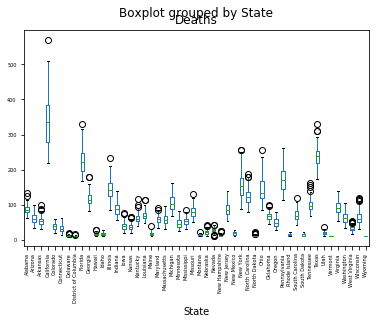

In [43]:
stroke_death_data.boxplot(by='State', 
                       column=['Deaths'], 
                       grid=False, rot=90, fontsize=5)

Мы должны учесть что штаты заселены очень неравномерно и для корректности сравнения смертности по штатам необходимо масштабирование

In [86]:
states_population_file = 'datasets/us-population-by-state-and-count.csv'
states_population_raw = pd.read_csv(states_population_file)
# Print the head of the DataFrame
print(states_population_raw.head())

                                  Year    Alabama    Alaska    Arizona  \
0                                 2012  4777326.0  711139.0  6410979.0   
1  US population (by state and county)        NaN       NaN        NaN   

    Arkansas  California   Colorado  Connecticut  Delaware  \
0  2916372.0  37325068.0  5042853.0    3572213.0  900131.0   
1        NaN         NaN        NaN          NaN       NaN   

   District of Columbia    ...     South Dakota  Tennessee       Texas  \
0              605759.0    ...         815871.0  6353226.0  25208897.0   
1                   NaN    ...              NaN        NaN         NaN   

        Utah   Vermont   Virginia  Washington  West Virginia  Wisconsin  \
0  2766233.0  625498.0  8014955.0   6738714.0      1850481.0  5687219.0   
1        NaN       NaN        NaN         NaN            NaN        NaN   

    Wyoming  
0  562803.0  
1       NaN  

[2 rows x 53 columns]


In [87]:
states_population = states_population_raw.T

In [88]:
states_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Year to Wyoming
Data columns (total 2 columns):
0    53 non-null object
1    1 non-null object
dtypes: object(2)
memory usage: 3.7+ KB


In [89]:
states_population.head()

,0,1
Year,2012,US population (by state and county)
Alabama,4.77733e+06,NaN
Alaska,711139,NaN
Arizona,6.41098e+06,NaN
Arkansas,2.91637e+06,NaN


In [90]:
sp = states_population[2:]

In [91]:
sp.head()

,0,1
Alaska,711139,NaN
Arizona,6.41098e+06,NaN
Arkansas,2.91637e+06,NaN
California,3.73251e+07,NaN
Colorado,5.04285e+06,NaN


In [92]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alaska to Wyoming
Data columns (total 2 columns):
0    51 non-null object
1    0 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


In [93]:
sp.reset_index(level=0, inplace=True)
sp1 = sp.iloc[:,0:2]

In [94]:
sp1.head()

,index,0
0,Alaska,711139
1,Arizona,6.41098e+06
2,Arkansas,2.91637e+06
3,California,3.73251e+07
4,Colorado,5.04285e+06


In [95]:
sp1.columns = ['State','PopulationStr']

In [96]:
sp1.head()

,State,PopulationStr
0,Alaska,711139
1,Arizona,6.41098e+06
2,Arkansas,2.91637e+06
3,California,3.73251e+07
4,Colorado,5.04285e+06


In [100]:
sp1[['PopulationStr']] = sp1[['PopulationStr']].apply(pd.to_numeric)

In [102]:
sp1.head(51)

,State,PopulationStr
0,Alaska,711139.0
1,Arizona,6410979.0
2,Arkansas,2916372.0
3,California,37325068.0
4,Colorado,5042853.0
5,Connecticut,3572213.0
6,Delaware,900131.0
7,District of Columbia,605759.0
8,Florida,18885152.0
9,Georgia,9714569.0


In [103]:
sp1.to_csv('datasets/population_by_state.csv')

In [104]:
stroke_death_data.State.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [110]:
len(stroke_death_data.State.unique())

50

# Присоединение численности населения 

Сейчас нужно к данным о смертности присоединить данные о численности населения в соответствующем штате

In [111]:
stroke_death_with_pop = pd.merge(stroke_death_data, sp1, on='State')

In [112]:
stroke_death_with_pop.head(20)

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr
0,Arizona,1999,1999/01,I64,100,6410979.0
1,Arizona,1999,1999/02,I64,83,6410979.0
2,Arizona,1999,1999/03,I64,81,6410979.0
3,Arizona,1999,1999/04,I64,76,6410979.0
4,Arizona,1999,1999/05,I64,68,6410979.0
5,Arizona,1999,1999/06,I64,61,6410979.0
6,Arizona,1999,1999/07,I64,67,6410979.0
7,Arizona,1999,1999/08,I64,68,6410979.0
8,Arizona,1999,1999/09,I64,58,6410979.0
9,Arizona,1999,1999/10,I64,69,6410979.0


Добавим колонку с номером месяца

In [113]:
s = '2000/05'
ss = s[-2:]
print(ss)

05


In [120]:
month_suffix = lambda s: s[-2:]
s = '2000/05'
print(month_suffix(s))

05


In [128]:
stroke_death_with_pop['Month'] = stroke_death_with_pop['Month Code'].apply(month_suffix).apply(pd.to_numeric)
stroke_death_with_pop['DeathPerMillion'] = stroke_death_with_pop['Deaths']/stroke_death_with_pop['PopulationStr']*1000000

In [129]:
stroke_death_with_pop.head()

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
0,Arizona,1999,1999/01,I64,100,6410979.0,1,15.598242
1,Arizona,1999,1999/02,I64,83,6410979.0,2,12.946541
2,Arizona,1999,1999/03,I64,81,6410979.0,3,12.634576
3,Arizona,1999,1999/04,I64,76,6410979.0,4,11.854664
4,Arizona,1999,1999/05,I64,68,6410979.0,5,10.606804


# Смертность в крупнейших штатах

<p><img src="https://www.cdc.gov/stroke/images/stroke-map.jpg"></p>

Выберем данные соответствующие 10 крупнейшим штатам 

In [132]:
most_populated_states = sp1.sort_values(by=['PopulationStr'], ascending=[False])

In [133]:
most_populated_states.head()

,State,PopulationStr
3,California,37325068.0
43,Texas,25208897.0
31,New York,19398125.0
8,Florida,18885152.0
12,Illinois,12823860.0


In [147]:
states_names_01_10 = most_populated_states.iloc[:10]['State'].tolist()
print(states_names_01_10)

['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Michigan', 'Georgia', 'North Carolina']


In [148]:
stroke_death_most_populted_01_10 = stroke_death_with_pop[stroke_death_with_pop['State'].isin(states_names_01_10)]

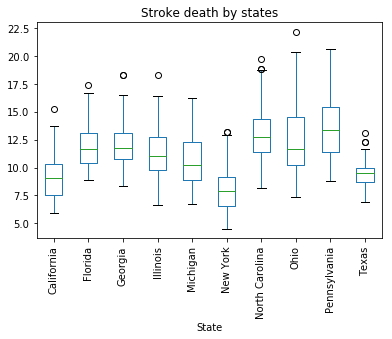

In [150]:
import matplotlib.pyplot as plt
stroke_death_most_populted_01_10.boxplot(by='State', 
                       column=['DeathPerMillion'], 
                       grid=False, rot=90)
plt.title("Stroke death by states")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

Следующие 10 штатов

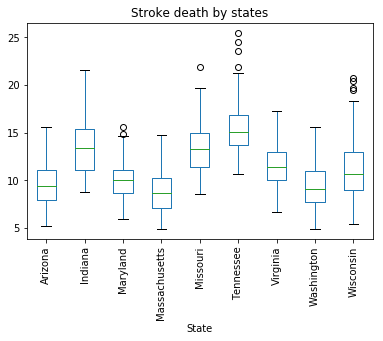

In [151]:
states_names_11_20 = most_populated_states.iloc[11:20]['State'].tolist()
stroke_death_most_populted_11_20 = stroke_death_with_pop[stroke_death_with_pop['State'].isin(states_names_11_20)]
stroke_death_most_populted_11_20.boxplot(by='State', 
                       column=['DeathPerMillion'], 
                       grid=False, rot=90)
plt.title("Stroke death by states")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

# Карта США

<p><img src="http://states-of-america.ru/karty-ssha/karty/karta-shtatov-ssha.jpg"></p>

Рассмотреть смертность только в летние месяцы, будут ли отличаться показатели южных и северных штатов сильнее?

In [154]:
# base dataframe stroke_death_with_pop
summer_stroke_death = stroke_death_with_pop[(stroke_death_with_pop['Month']>=5) & (stroke_death_with_pop['Month']<=9)]
summer_stroke_death.head()

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
4,Arizona,1999,1999/05,I64,68,6410979.0,5,10.606804
5,Arizona,1999,1999/06,I64,61,6410979.0,6,9.514927
6,Arizona,1999,1999/07,I64,67,6410979.0,7,10.450822
7,Arizona,1999,1999/08,I64,68,6410979.0,8,10.606804
8,Arizona,1999,1999/09,I64,58,6410979.0,9,9.046980


Повторим все шаги для этого подмножества данных.

In [155]:
summer_stroke_death_01_10 = summer_stroke_death[summer_stroke_death['State'].isin(states_names_01_10)]
summer_stroke_death_11_20 = summer_stroke_death[summer_stroke_death['State'].isin(states_names_11_20)]

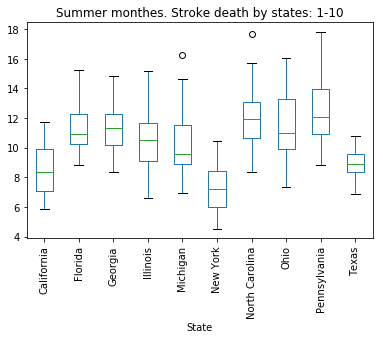

In [157]:
summer_stroke_death_01_10.boxplot(by='State', 
                       column=['DeathPerMillion'], 
                       grid=False, rot=90)
plt.title("Summer monthes. Stroke death by states: 1-10")
plt.suptitle("")

plt.show()

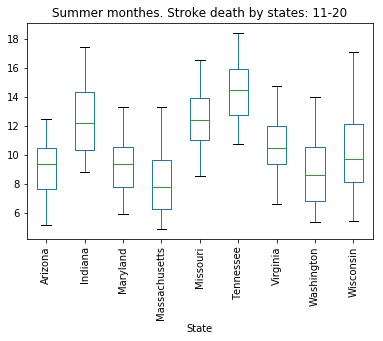

In [158]:
summer_stroke_death_11_20.boxplot(by='State', 
                       column=['DeathPerMillion'], 
                       grid=False, rot=90)
plt.title("Summer monthes. Stroke death by states: 11-20")
plt.suptitle("")

plt.show()

Вычислить персентили для "контрастных" штатов Новая Дакота и  Нью Мехико. Графики прироста средней температур по штатам

для "контрастных" штатов Новая Дакота и  Нью Мехико построить зависимость приростов смертности и прироста температурі 
добавить гистограммі 
сравнение в рамках одного щтата за разніе периоді: Флорида (лето, осень )

Создадим 2 базы для Флориды 

In [161]:
florda_summer = stroke_death_with_pop[(stroke_death_with_pop['Month']>=5) 
                                      & (stroke_death_with_pop['Month']<=8) 
                                      & (stroke_death_with_pop['State'] == 'Florida') ]
florda_autumn = stroke_death_with_pop[(stroke_death_with_pop['Month']>=9) 
                                      & (stroke_death_with_pop['Month']<=11) 
                                      & (stroke_death_with_pop['State'] == 'Florida') ]



In [162]:
florda_summer.head()

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
868,Florida,1999,1999/05,I64,260,18885152.0,5,13.767430
869,Florida,1999,1999/06,I64,254,18885152.0,6,13.449720
870,Florida,1999,1999/07,I64,288,18885152.0,7,15.250076
871,Florida,1999,1999/08,I64,257,18885152.0,8,13.608575
880,Florida,2000,2000/05,I64,235,18885152.0,5,12.443638


In [163]:
florda_autumn.head()

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
872,Florida,1999,1999/09,I64,223,18885152.0,9,11.808218
873,Florida,1999,1999/10,I64,258,18885152.0,10,13.661526
874,Florida,1999,1999/11,I64,259,18885152.0,11,13.714478
884,Florida,2000,2000/09,I64,232,18885152.0,9,12.284783
885,Florida,2000,2000/10,I64,288,18885152.0,10,15.250076


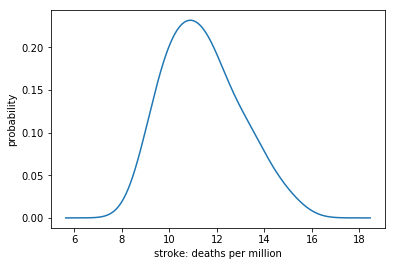

In [165]:
# Ploting the bootstrap % difference
ax = florda_summer['DeathPerMillion'].plot.kde()
_ = ax.set_xlabel('stroke: deaths per million')
_ = ax.set_ylabel('probability')

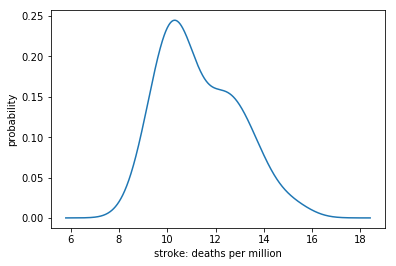

In [168]:
# Ploting the bootstrap % difference
ax = florda_autumn['DeathPerMillion'].plot.kde()
_ = ax.set_xlabel('stroke: deaths per million')
_ = ax.set_ylabel('probability')

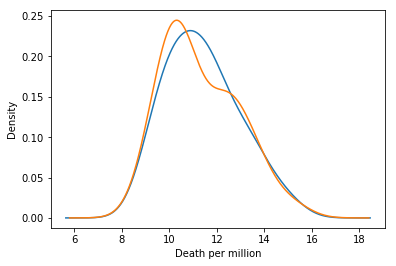

In [170]:
fig, ax1 = plt.subplots()
florda_summer['DeathPerMillion'].plot(kind='density')
florda_autumn['DeathPerMillion'].plot(kind='density')
ax1.set_xlabel("Death per million")
plt.show()

In [171]:
summer_deaths_mean = florda_summer['DeathPerMillion'].mean()

In [172]:
autumn_deaths_mean = florda_autumn['DeathPerMillion'].mean()

In [175]:
print('summer_deaths_mean: ', summer_deaths_mean) 
print('autumn_deaths_mean: ', autumn_deaths_mean)

summer_deaths_mean:  11.399879732949016
autumn_deaths_mean:  11.322149423023589


# Можем ли мы быть уверены в значимости этой разности?
It appears that there was a slight decrease in stroke deaths mean when the data was considered at colder time periods. It's a small change, but even small changes in deaths can have a large impact. But while we are certain of the difference in the data, how certain should we be that a stroke deaths mean at summer will be worse in the future?

There are a couple of ways we can get at the certainty of these numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate stroke deaths mean for those samples. The variation in stroke deaths mean will give us an indication of how uncertain the stroke deaths mean numbers are.

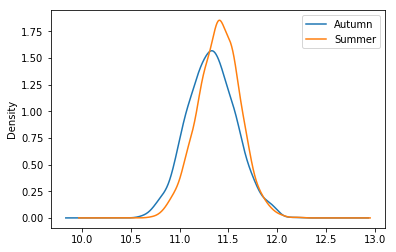

In [178]:
# Creating an list with bootstrapped means for each AB-group
iterations = 1500
boot_summer = []
boot_autumn = []
for i in range(iterations):
    boot_summer_mean = florda_summer['DeathPerMillion'].sample(frac=1, replace=True).mean()
    boot_autumn_mean = florda_autumn['DeathPerMillion'].sample(frac=1, replace=True).mean()
    boot_summer.append(boot_summer_mean)
    boot_autumn.append(boot_autumn_mean)
    
# Transforming the list to a DataFrame
dictionary = {'Summer': boot_summer, 'Autumn': boot_autumn}
boot_means = pd.DataFrame(data = dictionary)
# A Kernel Density Estimate plot of the bootstrap distributions
boot_means.plot.kde()

##  Zooming in on the difference
<p>These two distributions above represent the bootstrap uncertainty over what the underlying stroke deaths could be for the two AB-groups. Just eyeballing this plot, we can see that there seems to be some evidence of a difference, albeit small. Let's zoom in on the difference in stroke deaths</p>

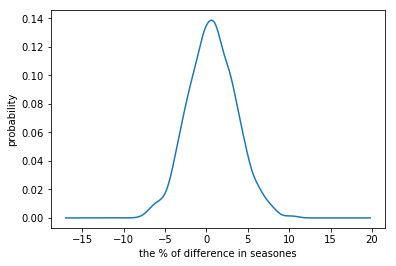

In [181]:
# Adding a column with the % difference between the two AB-groups
boot_means['diff'] = (boot_means['Summer']-boot_means['Autumn'])/boot_means['Autumn']*100

# Ploting the bootstrap % difference
ax = boot_means['diff'].plot.kde()
_ = ax.set_xlabel('the % of difference in seasones')
_ = ax.set_ylabel('probability')

In [182]:
# Calculating the probability that stroke deaths is greater in summer
prob = (boot_means['diff'] > 0).mean()

# Pretty printing the probability
print(prob)

0.5873333333333334
